<a href="https://colab.research.google.com/github/vibhuti9419/Breast_cancer_detection_Wisconsin_Clinic/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


USERNAME = "Vibhuti_Thummar_0XZpH"
PASSWORD = "rhf=a9sz8=HWhiN"


def proxy_request(url):
  payload = {
    "source": "universal",
    "url": "https://www.redfin.ca/on",
    "geo_location": "Canada"
  }

  response = requests.request(
    "POST",
    "https://realtime.oxylabs.io/v1/queries",
    auth=(USERNAME, PASSWORD),
    json=payload,
  )



  if response.status_code == 200:
    response_html = response.json()["results"][0]["content"]
    return BeautifulSoup(response_html, "lxml")
  else:
    print(f"Request failed with status code: {response.status_code}")
    print(response.text)
    return None



soup = proxy_request("url")

price1 = soup.find_all("span", {"class": "bp-Homecard__Price--value"})
address = soup.find_all("div", {"class": "bp-Homecard__Address"})
bed_count = soup.find_all("span", {"class": "bp-Homecard__Stats--beds"})
baths_count = soup.find_all("span", {"class": "bp-Homecard__Stats--baths"})
sqft_count = soup.find_all("span", {"class": "bp-Homecard__LockedStat--value"})
Home_Amenities = soup.find_all("span", {"class": "KeyFacts-item"})

data = []

for i in range(len(price1)):
    try:
        price = price1[i].get_text(strip=True)
        addr = address[i].get_text(strip=True)
        beds = bed_count[i].get_text(strip=True)
        baths = baths_count[i].get_text(strip=True)
        sqft = sqft_count[i].get_text(strip=True)
        amenities = Home_Amenities[i].get_text(strip=True)

        data.append({
            "price": price,
            "address": addr,
            "beds": beds,
            "baths": baths,
            "sqft": sqft,
            "amenitie": amenities
        })
    except IndexError:

        print("Error: Lists have different lengths or element not found")


df = pd.DataFrame(data)
df.to_csv("real_estate_data_ontario.csv", index=False)

Request failed with status code: 401
{"message":"Unauthorized"}



AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


%matplotlib inline

# Use pd.read_excel instead of pd.read_csv for Excel files (.xlsx)
data_ontario = pd.read_excel('/content/Real_estate_data_ontario_wxcel.xlsx')
data_ontario.head()
data_ontario.columns.values

array(['Price', 'Address', 'Beds_Count', 'Baths_Count', 'Square fit',
       'City', 'Home_Amenities', 'Year'], dtype=object)

In [ ]:
data_ontario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           600 non-null    object
 1   Address         600 non-null    object
 2   Beds_Count      600 non-null    int64 
 3   Baths_Count     600 non-null    int64 
 4   Square fit      600 non-null    int64 
 5   City            600 non-null    object
 6   Home_Amenities  600 non-null    object
 7   Year            600 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 37.6+ KB


In [ ]:
data_ontario.describe()

,Beds_Count,Baths_Count,Square fit,Year
count,600.000000,600.000000,600.000000,600.000000
mean,3.248333,2.331667,5016.188333,2022.528333
std,1.363731,1.140394,2244.954800,1.381682
min,1.000000,1.000000,959.000000,2020.000000
25%,2.000000,2.000000,3460.000000,2021.000000
50%,3.000000,2.000000,4616.000000,2023.000000
75%,4.000000,3.000000,6405.000000,2024.000000
max,9.000000,7.000000,16200.000000,2024.000000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


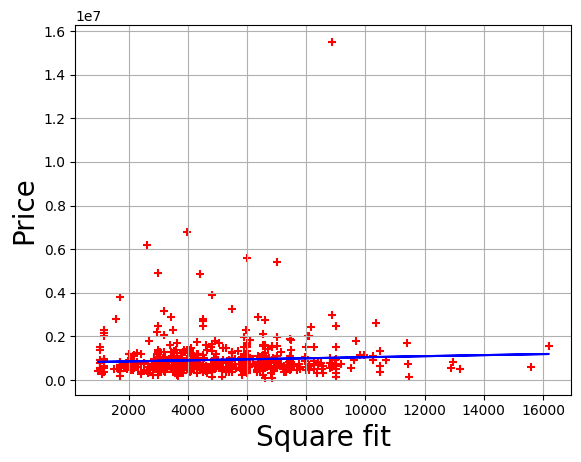

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data_ontario)
df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True).astype(float)
reg = LinearRegression()
reg.fit(df[['Square fit']], df['Price'])

plt.scatter(df['Square fit'],df['Price'],color='red',marker='+')
plt.xlabel('Square fit',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.plot(df['Square fit'],reg.predict(df[['Square fit']].values),color='blue')
plt.grid(True)
plt.show()

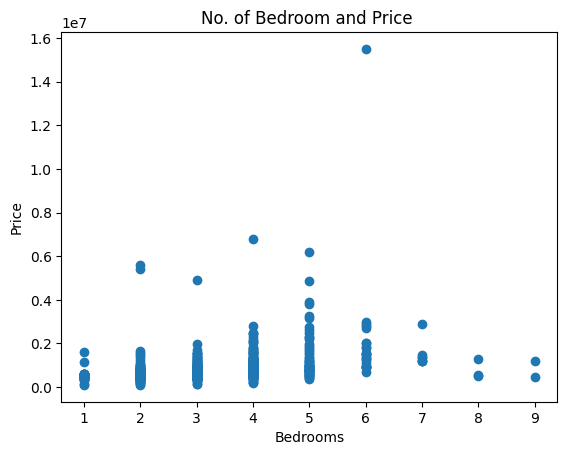

In [ ]:
plt.scatter(df.Beds_Count,df.Price)
plt.title("No. of Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


Mean Squared Error: 227632238512.9745
Intercept (β0): 766172.2203483207
Coefficient (β1): [40.69508506]


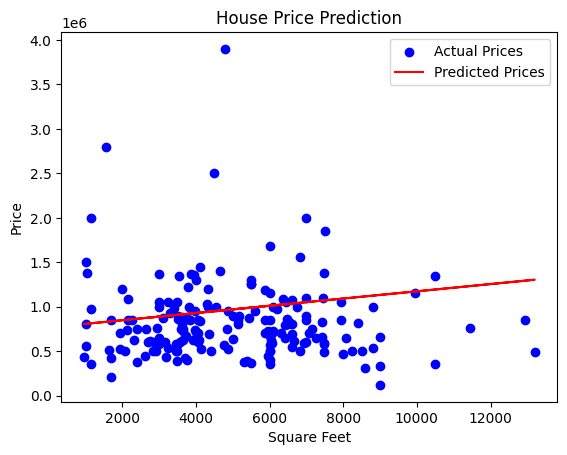

Predicted price for a 3500 sq. ft. house: $908,605.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



X = df[['Square fit']]
y = df['Price']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


print(f"Intercept (β0): {model.intercept_}")
print(f"Coefficient (β1): {model.coef_}")

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

# (e.g., 3500 square feet)
new_value = np.array([[3500]])
predicted_price = model.predict(new_value)
print(f"Predicted price for a 3500 sq. ft. house: ${predicted_price[0]:,.2f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 'Price' column is already numeric
if not pd.api.types.is_numeric_dtype(df['Price']):
    # apply the string replacement
    df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True).astype(float)

X = df[['Square fit', 'Beds_Count', 'Baths_Count']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)  # Train the model on the entire dataset

y_pred = model.predict(X)  # Predict on the entire dataset

df['predicted_price'] = y_pred  # Add predicted prices as a new column
predictions_df = pd.DataFrame({'predicted_price': y_pred, 'city': df['City']})

df.to_excel('/content/Real_estate_data_ontario_with_predictions.xlsx', index=False)  # Save to a new Excel file
print("Predictions saved to 'Real_estate_data_ontario_with_predictions.xlsx'")

Predictions saved to 'Real_estate_data_ontario_with_predictions.xlsx'


Text(0.5, 1.0, 'Predicted Price by City')

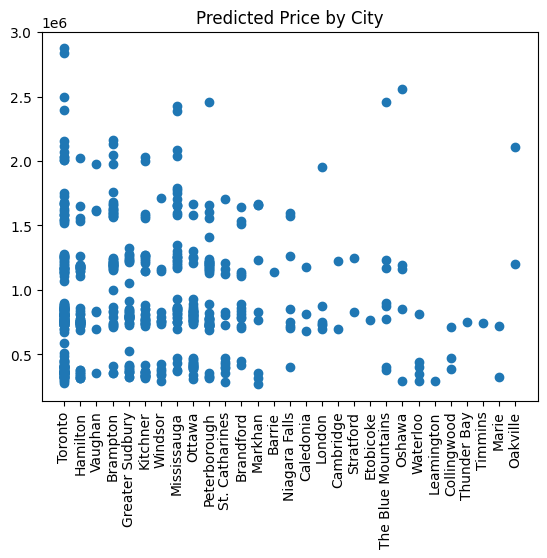

In [ ]:
plt.scatter(df['City'], predictions_df['predicted_price'])
plt.xticks(rotation=90)
plt.title("Predicted Price by City")

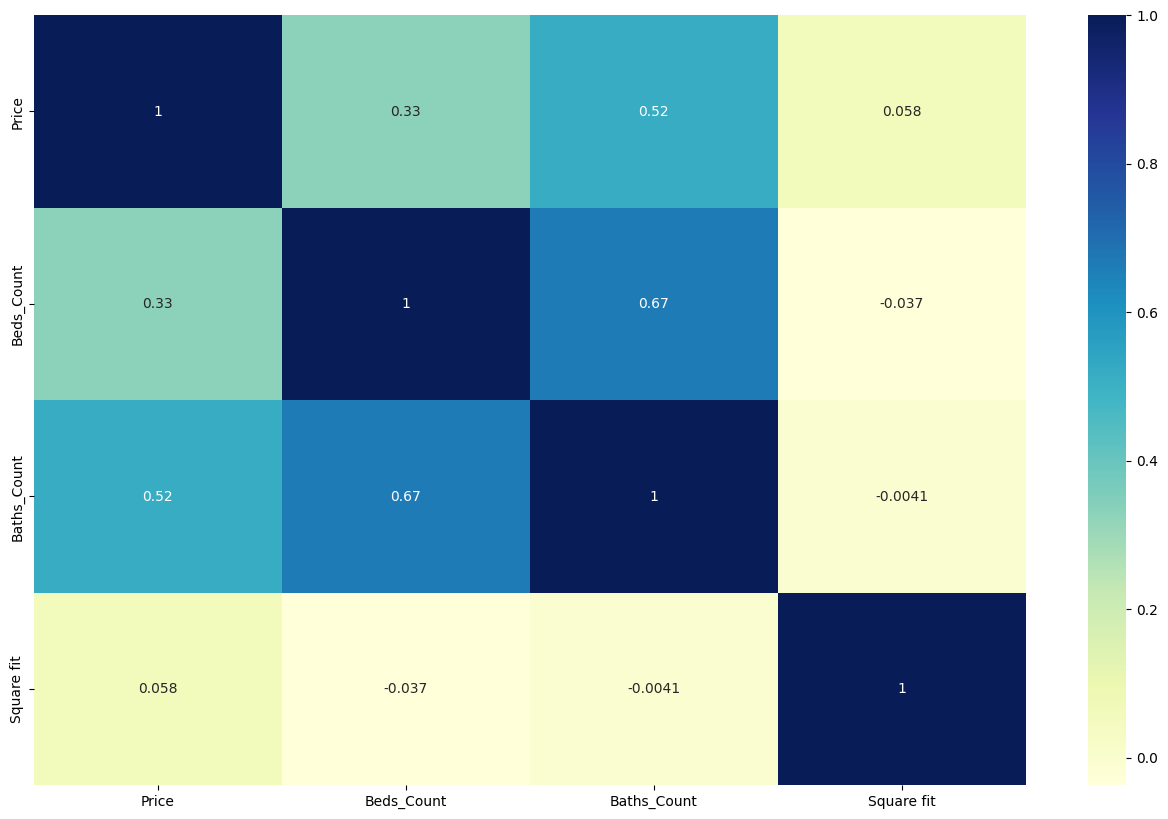

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

data = pd.DataFrame(data_ontario)

# analyzing correlation
scaler = MinMaxScaler()

numeric_columns = ['Price', 'Beds_Count', 'Baths_Count', 'Square fit']
data['Price'] = data['Price'].str.replace('[\$,]', '', regex=True).astype(float)

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
plt.figure(figsize=(16, 10))
# Include only numeric columns in correlation matrix
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="YlGnBu")
plt.show()